# Principal Component Analysis (PCA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
****************************************************************************************************


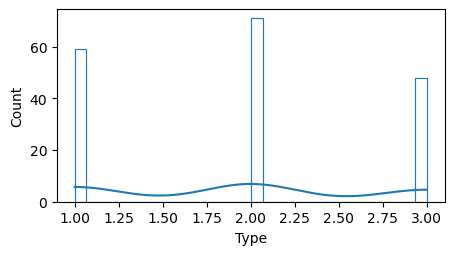

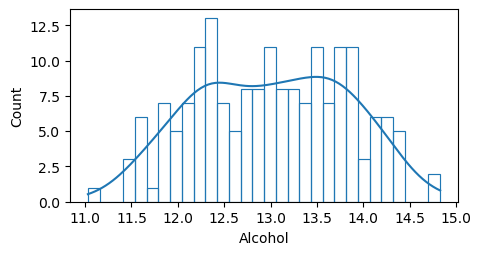

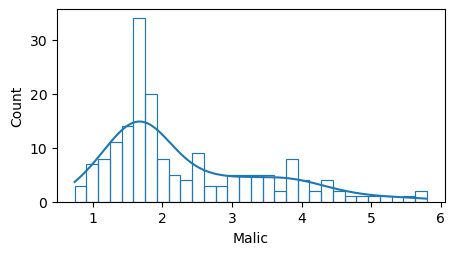

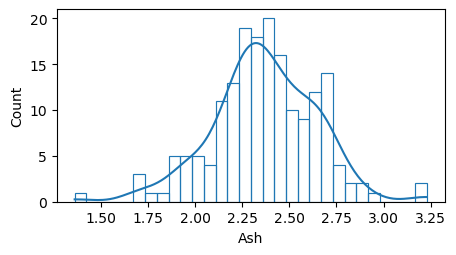

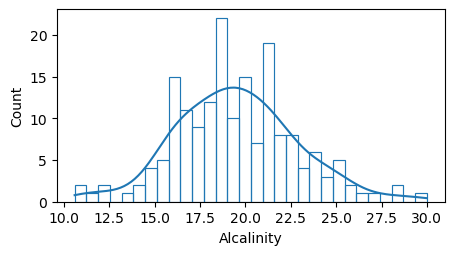

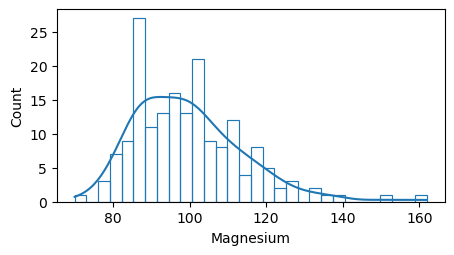

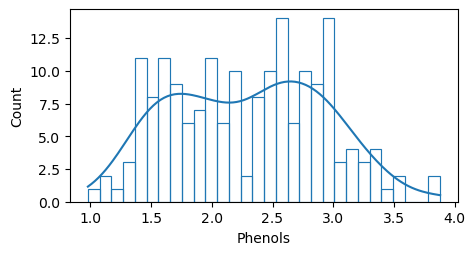

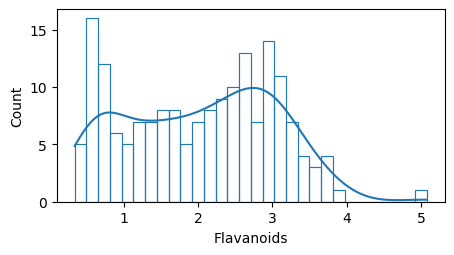

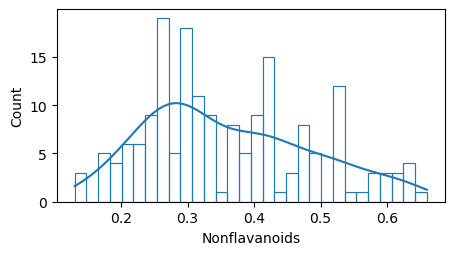

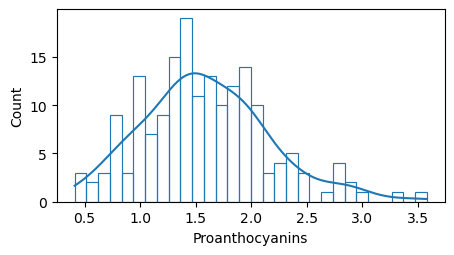

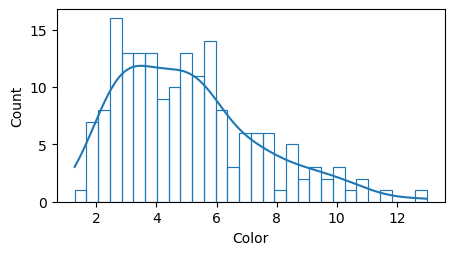

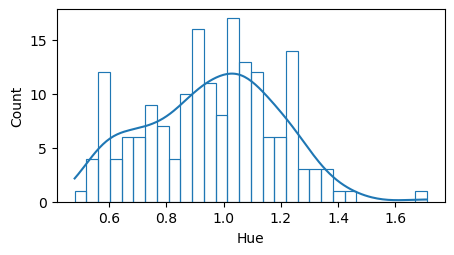

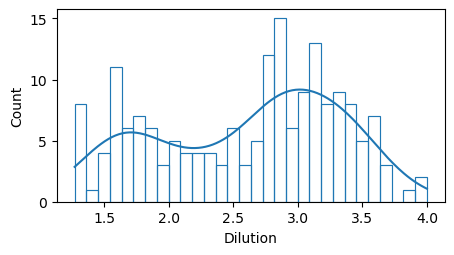

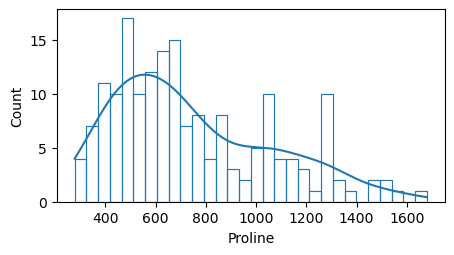

****************************************************************************************************


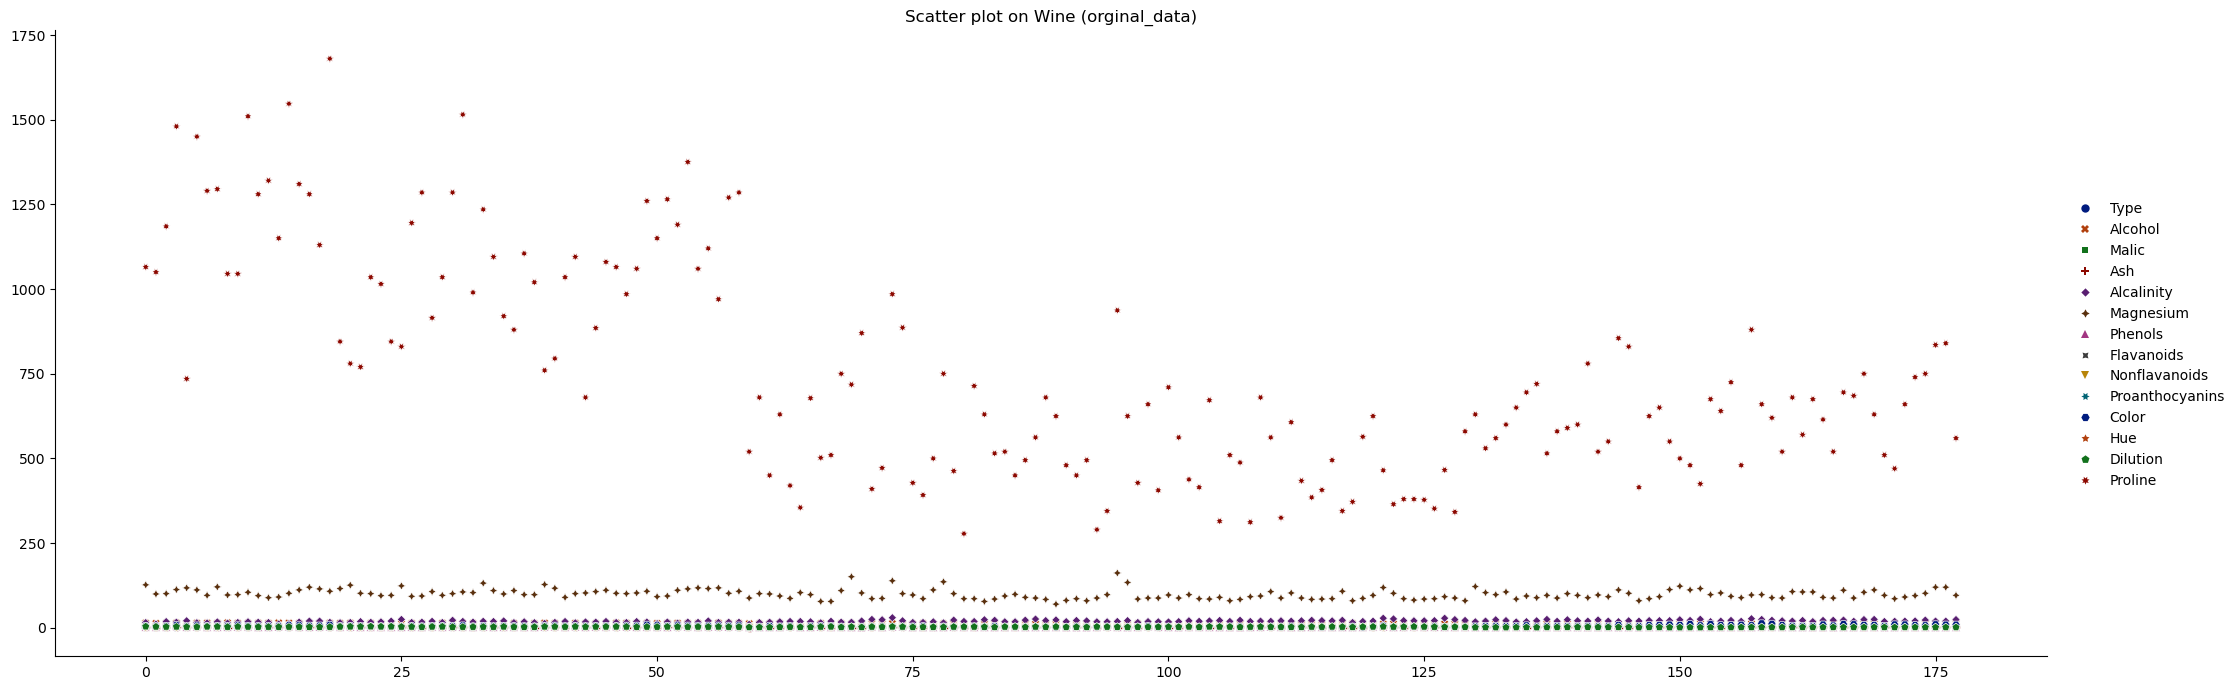

****************************************************************************************************


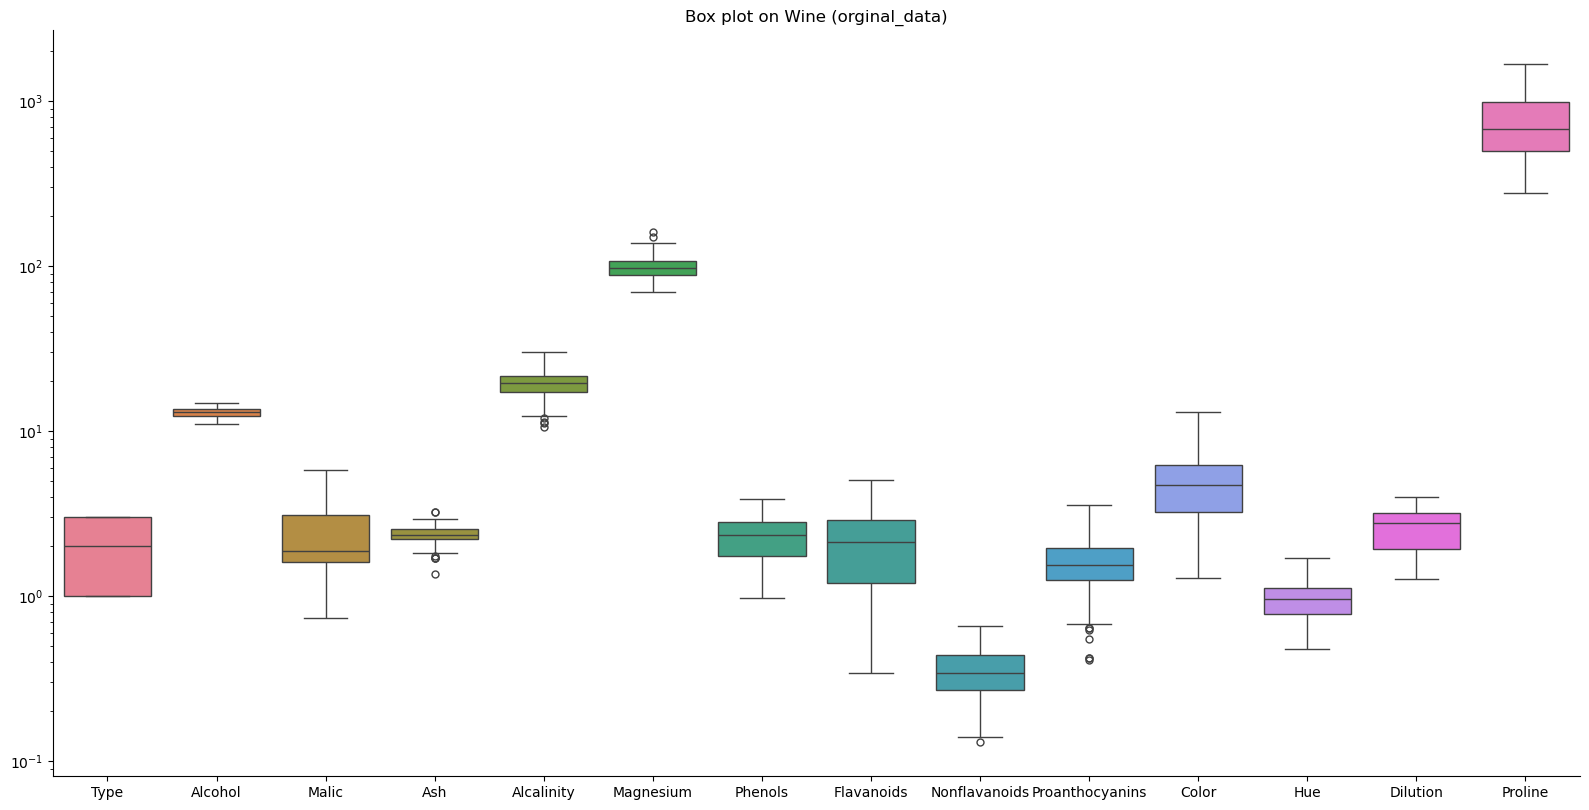

****************************************************************************************************


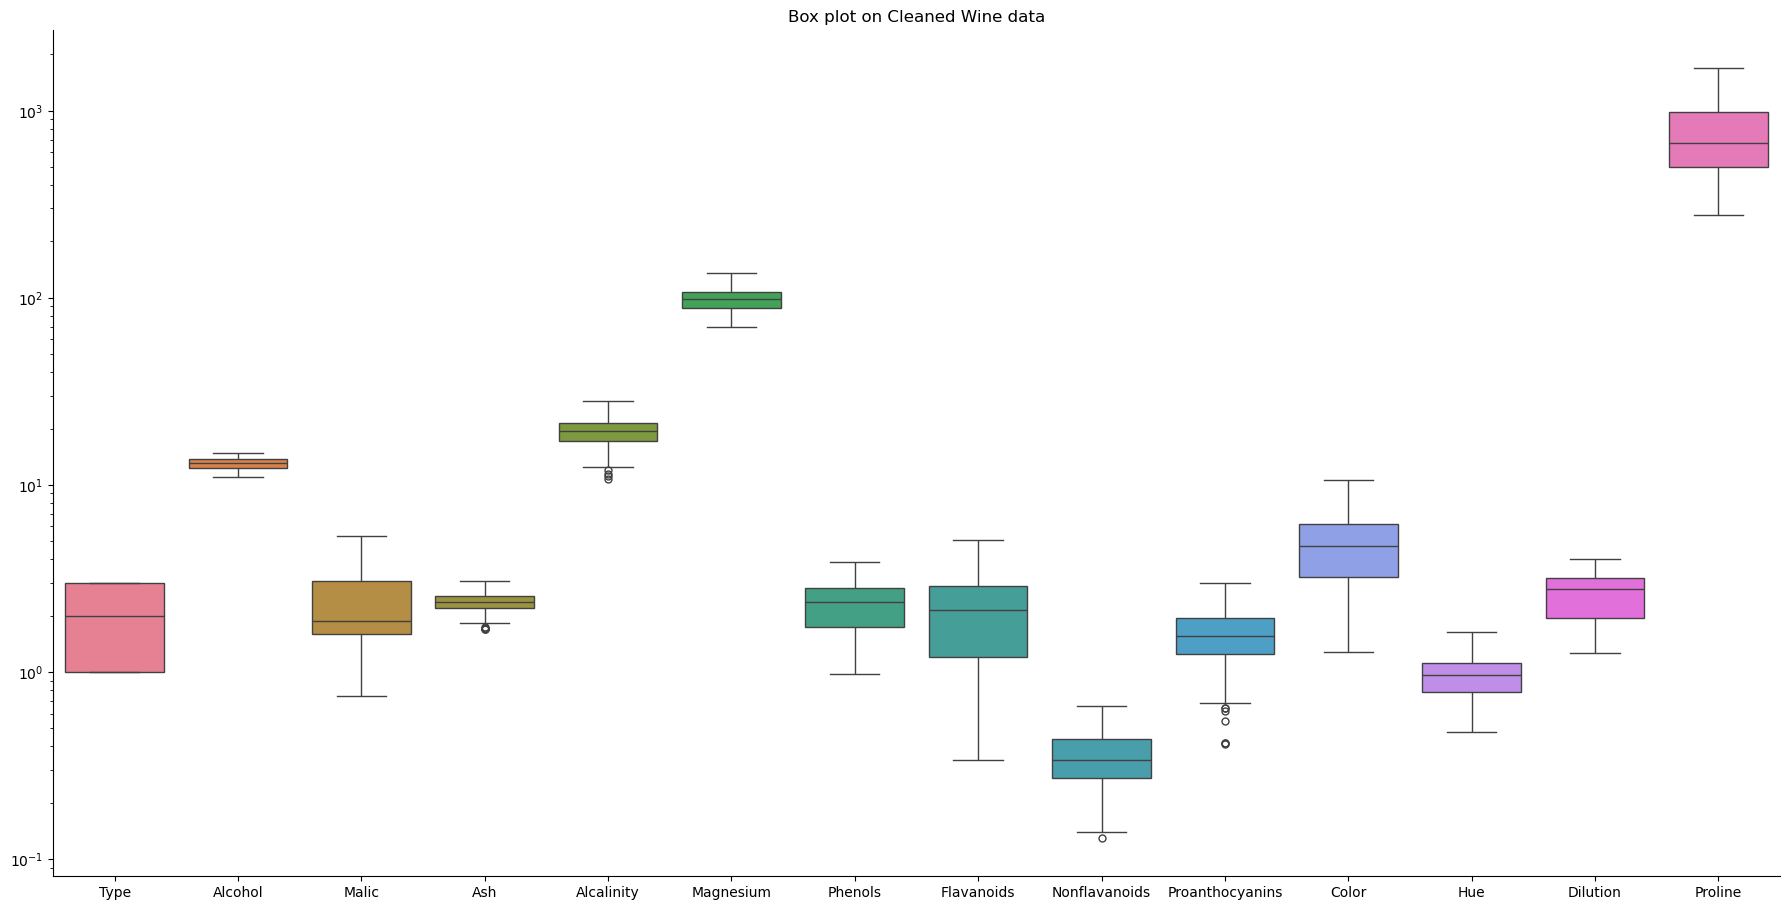

****************************************************************************************************


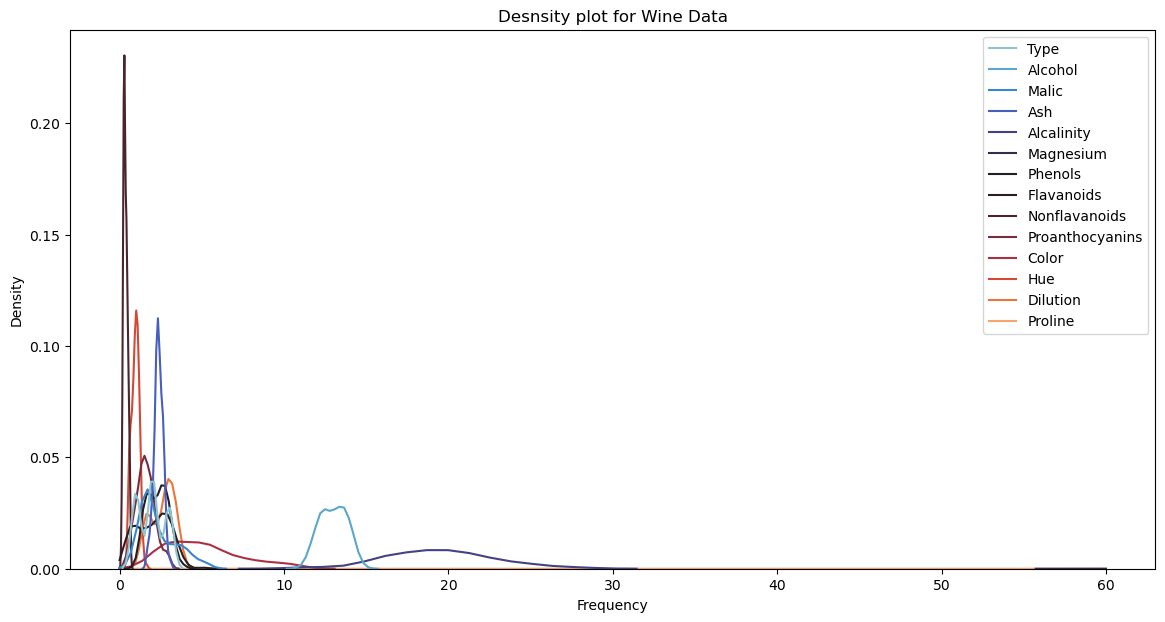

****************************************************************************************************


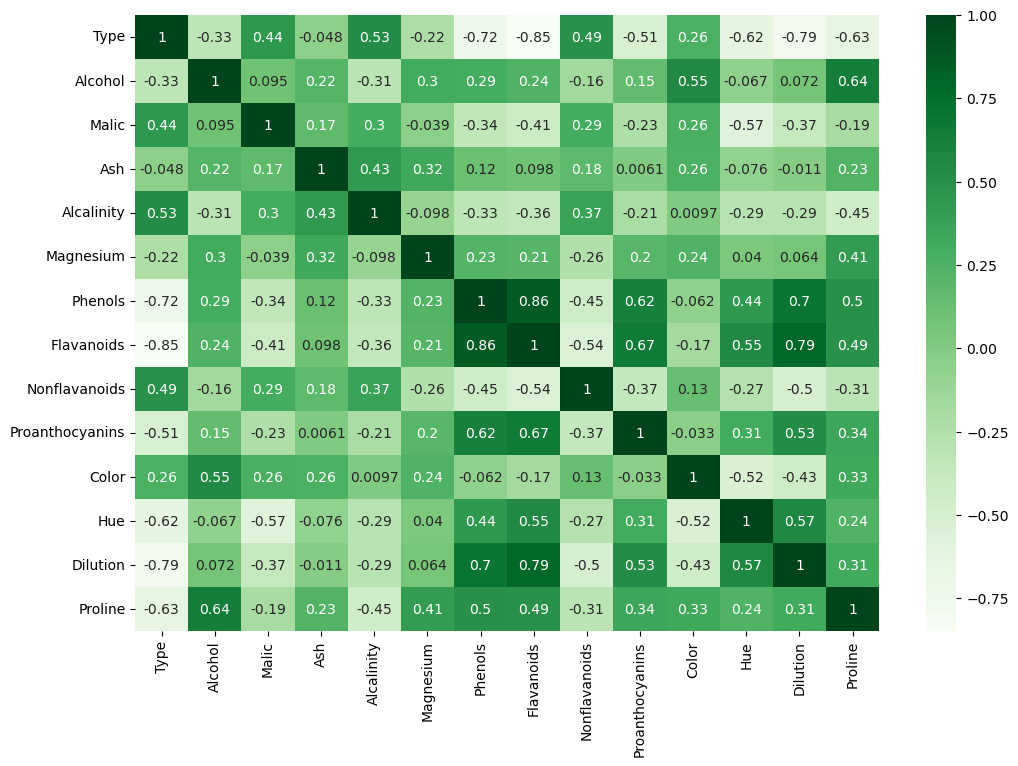

****************************************************************************************************


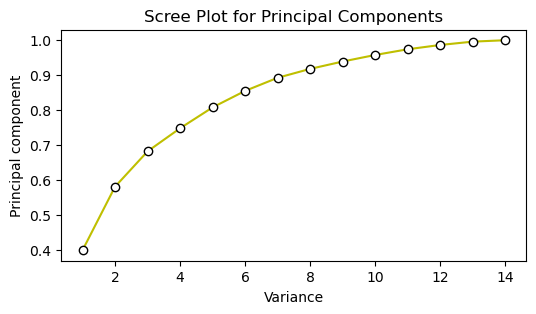

****************************************************************************************************
     Type  Alcohol  Malic      Ash  Alcalinity  Magnesium  Phenols  \
59      2    12.37   0.94  1.68875       10.75       88.0     1.98   
60      2    12.33   1.10  2.28000       16.00      101.0     2.05   
61      2    12.64   1.36  2.02000       16.80      100.0     2.02   
62      2    13.67   1.25  1.92000       18.00       94.0     2.10   
63      2    12.37   1.13  2.16000       19.00       87.0     3.50   
..    ...      ...    ...      ...         ...        ...      ...   
125     2    12.07   2.16  2.17000       21.00       85.0     2.60   
126     2    12.43   1.53  2.29000       21.50       86.0     2.74   
127     2    11.79   2.13  2.78000       27.95       92.0     2.13   
128     2    12.37   1.63  2.30000       24.50       88.0     2.22   
129     2    12.04   4.30  2.38000       22.00       80.0     2.10   

     Flavanoids  Nonflavanoids  Proanthocyanins  Color   H

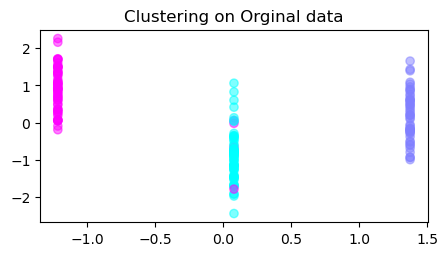

****************************************************************************************************


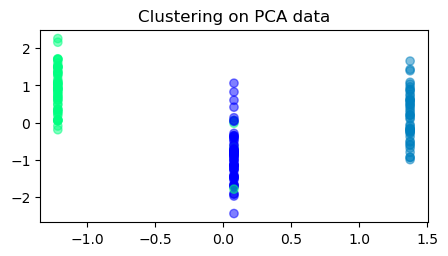

****************************************************************************************************


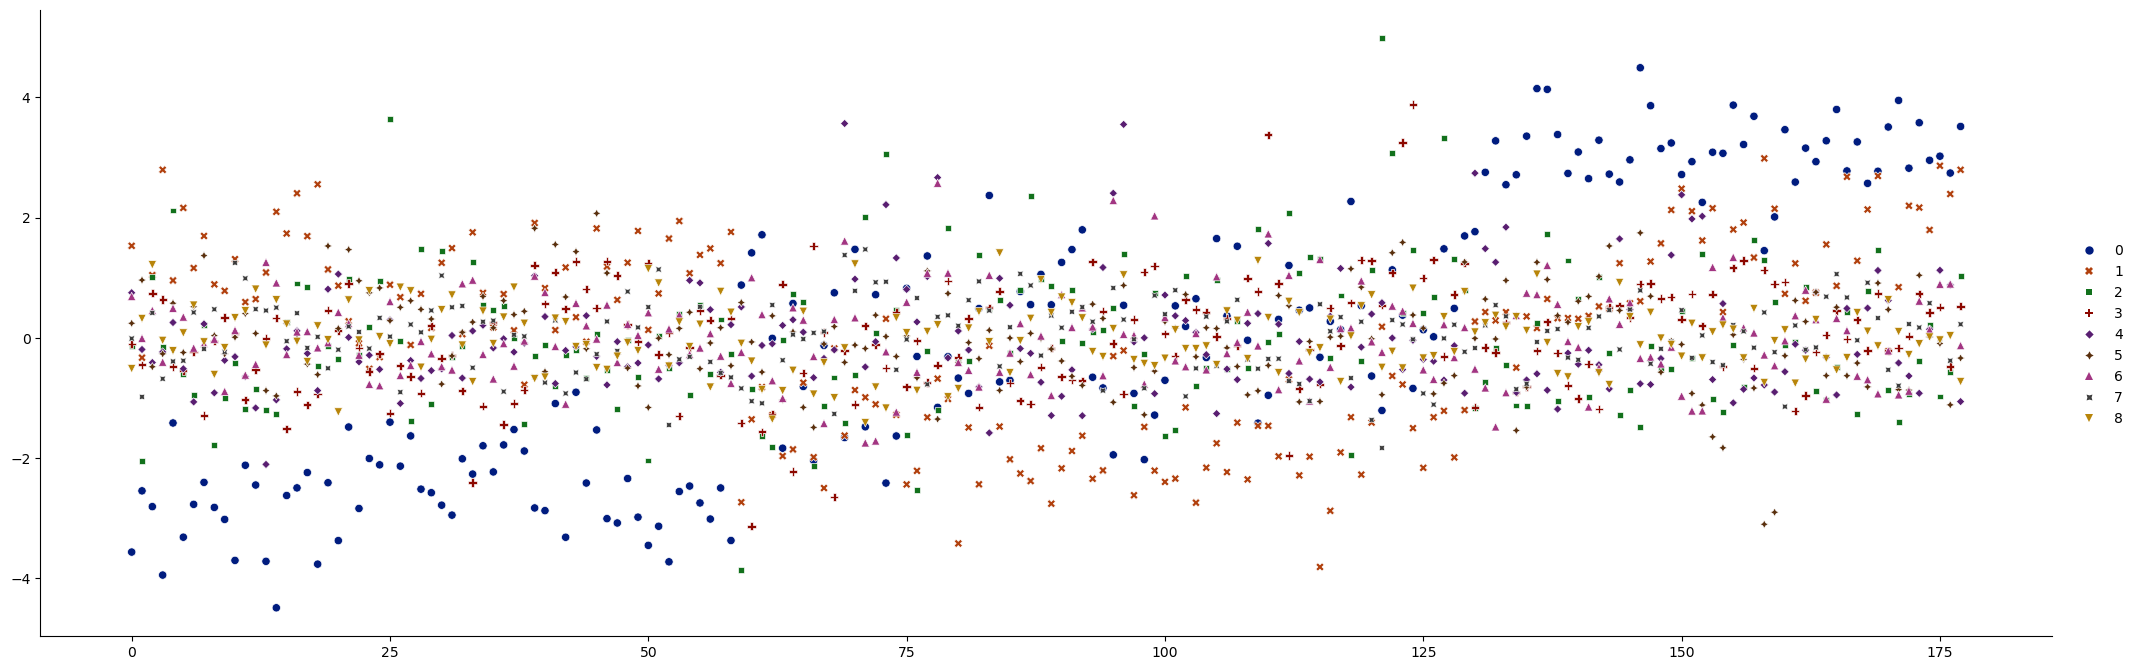

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Loading data set
wineog=pd.read_csv('wine.csv')
# Inspecting data
wineog.head()
wineog.info()
print('*'*100)
wineog.describe()
wineog.shape
wineog.isnull().sum()
wineog[wineog.duplicated()]
# Visualisation of wine data
for x in wineog:
    plt.figure(figsize=(5,2.5))
    sns.histplot(wineog[x],kde=True,bins=30,fill=False)
    plt.show()
print('*'*100)
# Building a scatter plot
sns.relplot(wineog,kind='scatter',palette='dark',height=7,aspect=3)
plt.title('Scatter plot on Wine (orginal_data)')
plt.show()
print('*'*100)
# Ploting box plot for outliers removal (ploted in log_scale,which display minute outliers in plot)
sns.catplot(wineog,kind='box',height=8,aspect=2,log_scale=True)
plt.title('Box plot on Wine (orginal_data)')
plt.show()
print('*'*100)
# Removing outliers by IQR method
wine=wineog.copy()
for y in wine:
    Q1=wine[y].quantile(0.25)
    Q3=wine[y].quantile(0.75)
    IQR=Q3-Q1
    Ulimit=Q3+1.5*IQR
    Llimit=Q1-1.5*IQR
    wine[y]=wine[y].apply(lambda x : Ulimit if x > Ulimit else x)
    wine[y]=wine[y].apply(lambda x : Llimit if x <= Llimit else x)
# Visualising data after Outliers removal
sns.catplot(wine,kind='box',height=9,aspect=2,log_scale=True)
plt.title('Box plot on Cleaned Wine data')
plt.show()
print('*'*100)
# Ploting density plot for a view
plt.figure(figsize=(14,7))
sns.kdeplot(wine,gridsize=20,clip=(0,60),palette='icefire')
plt.title('Desnsity plot for Wine Data')
plt.xlabel('Frequency')
plt.show()
print('*'*100)
# Determining corelation and ploting HEATMAP
cor=wine.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='Greens')
plt.show()
print('*'*100)
# Scaling data by Standardization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
wine_scaled=scale.fit_transform(wine)
#Performing PCA on Orginal Data
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(wine_scaled)
pca.explained_variance_ratio_
cum_var=np.cumsum(pca.explained_variance_ratio_)
cum_var
#ploting Scree plot to find variance in principle Components
plt.figure(figsize=(6,3))
plt.plot(range(1,len(cum_var)+1),cum_var,marker='o',color='y',mfc='w',mec='k')
plt.title('Scree Plot for Principal Components')
plt.xlabel('Variance')
plt.ylabel('Principal component')
plt.show()
print('*'*100)
# Clustering Orginal data
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=42)
model.fit(wine_scaled)
wine['labels']=model.labels_
grp=wine.groupby('labels')
for x,y in grp:
    print(y)
    print('-'*97)
print('*'*100)
# Evaluating model by metrics
from sklearn.metrics import silhouette_score,davies_bouldin_score
silhou_score=silhouette_score(wine_scaled,wine['labels'])
davies_score=davies_bouldin_score(wine_scaled,wine['labels'])
print(f'Original Data - Silhouette Score : {silhou_score}/nDavies Bouldin Score : {davies_score}')
print('*'*100)
# finding no of components that are required
n_comp=np.argmax(cum_var>=0.92)+1
n_comp
#Extracting principle components
model1=PCA(n_components=n_comp,random_state=42)
pca_df=model1.fit_transform(wine_scaled)
# Clustering PCA Data
pca_model=model.fit(pca_df)
model.labels_
wine['lab_pc']=model.labels_
#Evaluating Metrics
sil_score=silhouette_score(wine_scaled,wine['lab_pc'])
davi_score=davies_bouldin_score(wine_scaled,wine['lab_pc'])
print(f'PCA transformed data-Silhouette Score : {sil_score}/nDavies Bouldin Score : {davi_score}')
print('*'*100)
# Scatter plot on  clusterd Orginal Data 
plt.figure(figsize=(5, 2.5))
plt.scatter(wine_scaled[:, 0], wine_scaled[:, 1],c=wine['labels'], cmap='cool', alpha=0.5)
plt.title('Clustering on Orginal data')
plt.show()
print('*'*100)
# Scatter plot on Clusterd PCA Data
plt.figure(figsize=(5, 2.5))
plt.scatter(wine_scaled[:, 0], wine_scaled[:, 1],c=wine['lab_pc'], cmap='winter', alpha=0.5)
plt.title('Clustering on PCA data')
plt.show()
print('*'*100)
# Scatter plot for
sns.relplot(pca_df,kind='scatter',palette='dark',height=7,aspect=3)
plt.show()


#### Comparision & Analysis
    1.Result obtained from both Orginal Dataset and PCA transformed Dataset are seems to same.When analysing indeep Silhouette score and Davies bouldin score are same this is because Dataset is efficient and PCA in this case reduced the noise and outliers.This PCA is not that much usefull in this case.
    2.Key similarities are clustring metrics are same and difference is Number of features were Readuce.
    3.Using PCA before clustering reduces dimensionality, removes noise, and improves efficiency but may lose interpretability and important information. Clustering directly on the original dataset preserves feature meaning but can be inefficient and affected by irrelevant or redundancy.

#### Conclusion & Insights
    There are total of 14 features along with type.All of this were non null and numeric with out any duplicates.When scatter plot is build by orginal data a notable point is data is fully dispersed and noise there is less corelation with in variables and some of them have negative corelation between them.From box plot majority of Outliers are removed that are  Magnesium,Ash,Alcalinity and other.Some features, like Proline, have significantly higher values, leading to skewed distributions and making comparisons difficult more over features are concentrated nearby Zero.So it is must to scale values for KMeans analysis.Phenols,Flavanoids are having high correlation with Dilution,proanthocyanins.Scree plot explains the variance of Principal componets in PCA.These are further divided into 3 Clusters,Silhouette score and davies bouldin score are same in both cases i.e., before and after applying PCA .But advantage of applying PCA ia noise and reduency is reduced.
    Finally I conclude that Data Set is efficient after Cleaning data it perform well and no pca is needed.But in order to reduce noise and redundency pca slighty helpful.some in 2 group are misclassified , remaining 2 are performing decently.